In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_insurance_claims = pd.read_csv("Updated_Encoded_Insurance_Fraud_Dataset.csv")
df_ins = pd.read_csv("C:/Users/roshn/OneDrive/Documents/GitHub/ABDA_2025/insurance_claims.csv")

#treat real dataset
df_ins.replace('?', pd.NA, inplace=True)

# Impute missing values for categorical and numeric columns
for col in df_ins.select_dtypes(include=['object']).columns:
    df_ins[col].fillna(df_ins[col].mode()[0], inplace=True)

for col in df_ins.select_dtypes(include=['number']).columns:
    df_ins[col].fillna(df_ins[col].mean(), inplace=True)


binary_mapping = {'250/500': 1, '100/300': 0, '500/1000': 2, 'NO': 0}
df_ins.replace(binary_mapping, inplace=True)

df_ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,1,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,0,2000,1413.14,5000000,430632,...,0,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,1,2000,1415.74,6000000,608117,...,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,2,1000,1583.91,6000000,610706,...,0,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [14]:
df_insurance_claims['age'] = df_ins['age']
df_insurance_claims['policy_deductable'] = df_ins['policy_deductable']
# df_insurance_claims['policy_csl'] = df_ins['policy_csl']
df_insurance_claims.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_hobbies,insured_relationship,capital-gains,...,insured_occupation_transport-moving,total_claim_sum,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,policy_state,policy_csl,policy_annual_premium.1,umbrella_limit.1,incident_type
0,328,48,1000,0.616396,-0.479476,MALE,MD,sleeping,husband,53300,...,0,0.714257,0,0,0,2,1,1406.91,0,2
1,228,42,2000,-0.242400,1.697980,MALE,MD,reading,other-relative,0,...,0,-1.807312,1,0,0,1,1,1197.22,5000000,3
2,134,29,2000,0.641911,1.697980,FEMALE,PhD,board-games,own-child,35100,...,0,-0.686362,1,0,0,2,0,1413.14,5000000,0
3,256,41,2000,0.652560,2.133471,FEMALE,PhD,board-games,unmarried,48900,...,0,0.403135,0,0,0,0,1,1415.74,6000000,2
4,228,44,1000,1.341309,2.133471,MALE,Associate,board-games,unmarried,66000,...,0,-1.753121,1,0,0,0,2,1583.91,6000000,3


In [45]:
df_insurance_claims['umbrella_limit.1'].min(), df_insurance_claims['umbrella_limit.1'].max()

(-1000000, 10000000)

<H2> Correlation


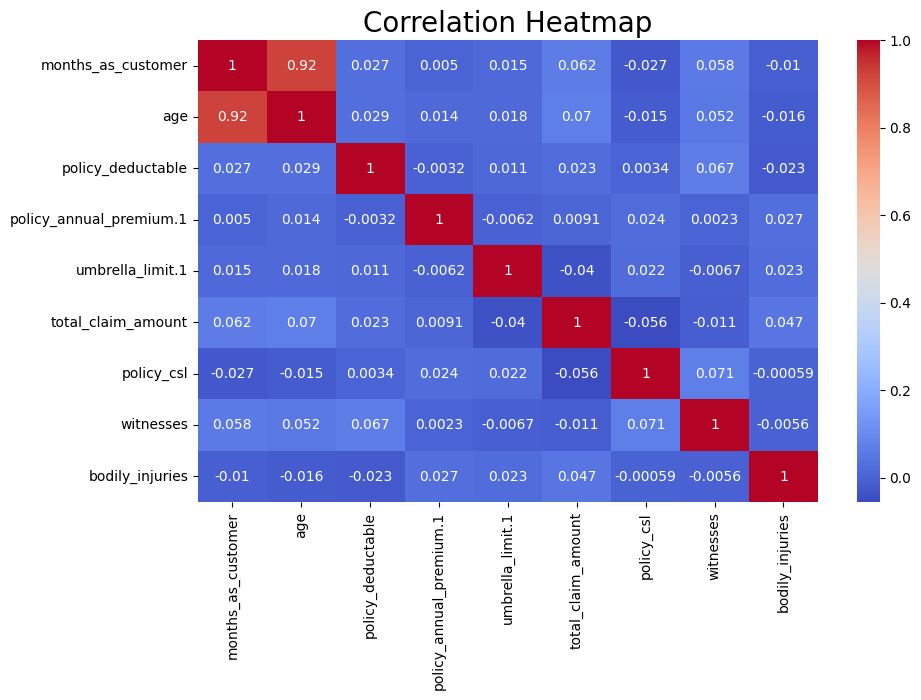

In [35]:
numeric_columns = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium.1', 'umbrella_limit.1', 'total_claim_amount', 'policy_csl', 'witnesses', 'bodily_injuries']
correlation_matrix = df_insurance_claims[numeric_columns].corr()


plt.figure(figsize=(10, 6))
# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", size=20)
# plt.xticks(rotation=80)
plt.show()

<H2> Spread of Data

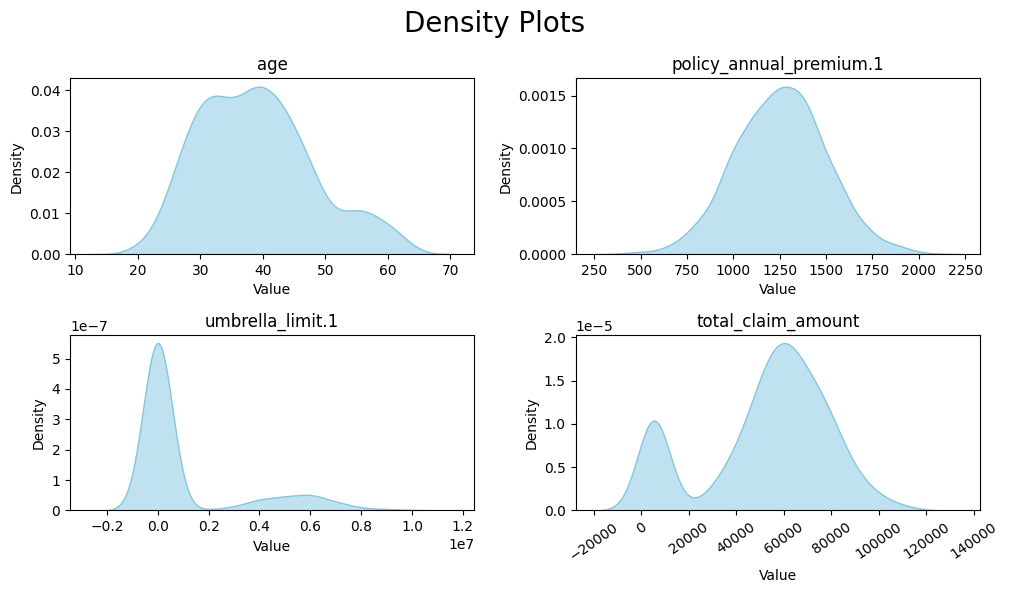

In [47]:
density_cols = ['age', 'policy_annual_premium.1', 'umbrella_limit.1', 'total_claim_amount']
density_data = df_insurance_claims[density_cols]

plt.figure(figsize=(10, 6))

for i, column in enumerate(density_cols, 1):
    plt.subplot(2, 2, i)  # Create a grid of subplots (2 rows, 2 columns)
    sns.kdeplot(data=density_data[column], fill=True, color=sns.color_palette("muted")[-1], alpha=0.5)
    plt.title(column)
    if i==4:
        plt.xticks(rotation=35)
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.suptitle('Density Plots', size=20)
plt.tight_layout()
plt.show()

C:\Users\roshn\AppData\Local\Temp\ipykernel_48232\3761697024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=discrete_data, x=column,  palette="Blues_d")
C:\Users\roshn\AppData\Local\Temp\ipykernel_48232\3761697024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=discrete_data, x=column,  palette="Blues_d")
C:\Users\roshn\AppData\Local\Temp\ipykernel_48232\3761697024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=discrete_data, x=column,  palette="Blues_d")
C:\Users\roshn\AppData\Local\Temp\ipykernel_48232\37

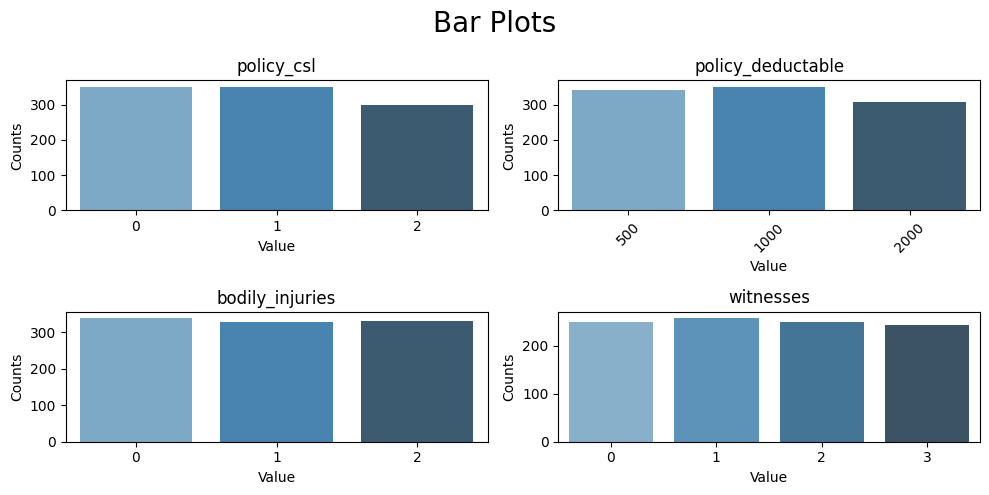

In [49]:
discrete_cols = ['policy_csl', 'policy_deductable',
                   'bodily_injuries', 'witnesses']
discrete_data = df_insurance_claims[discrete_cols]
plt.figure(figsize=(10, 5))

# Loop through each column and create a density plot
for i, column in enumerate(discrete_cols, 1):
    plt.subplot(2,2, i)  # Create a grid of subplots (3 rows, 3 columns)
    sns.countplot(data=discrete_data, x=column,  palette="Blues_d")
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Counts')
    if i==2:
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)

# Adjust layout
plt.suptitle('Bar Plots', size=20)
plt.tight_layout()
plt.show()
